In [23]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from IPython.core.display import HTML
import matplotlib.pyplot as plt
from scipy.stats import uniform

import warnings
warnings.filterwarnings('ignore')


In [24]:
data=pd.read_csv('heart (1).csv')

In [25]:
data.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
data = data[data['caa'] < 4] #drop the wrong ca values
data = data[data['thalachh'] > 0] # drop the wong thal value
print(f'The length of the data now is {len(data)} instead of 303!')

The length of the data now is 298 instead of 303!


Text(0.5, 1.05, 'Output Distribution')

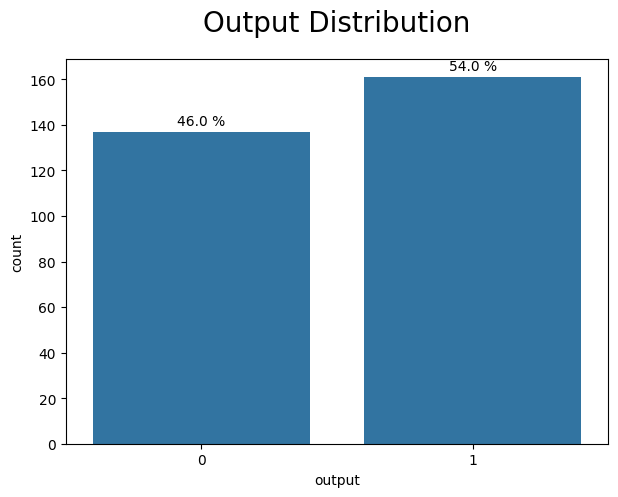

In [34]:
plt.figure(figsize=(7, 5))
total = float(len(data))
ax = sns.countplot(x=data['output'])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.1f} %'.format((height/total)*100), ha="center")

ax.set_title('Output Distribution', fontsize=20, y=1.05)  

In [ ]:
# Statistical summary of the numerical features

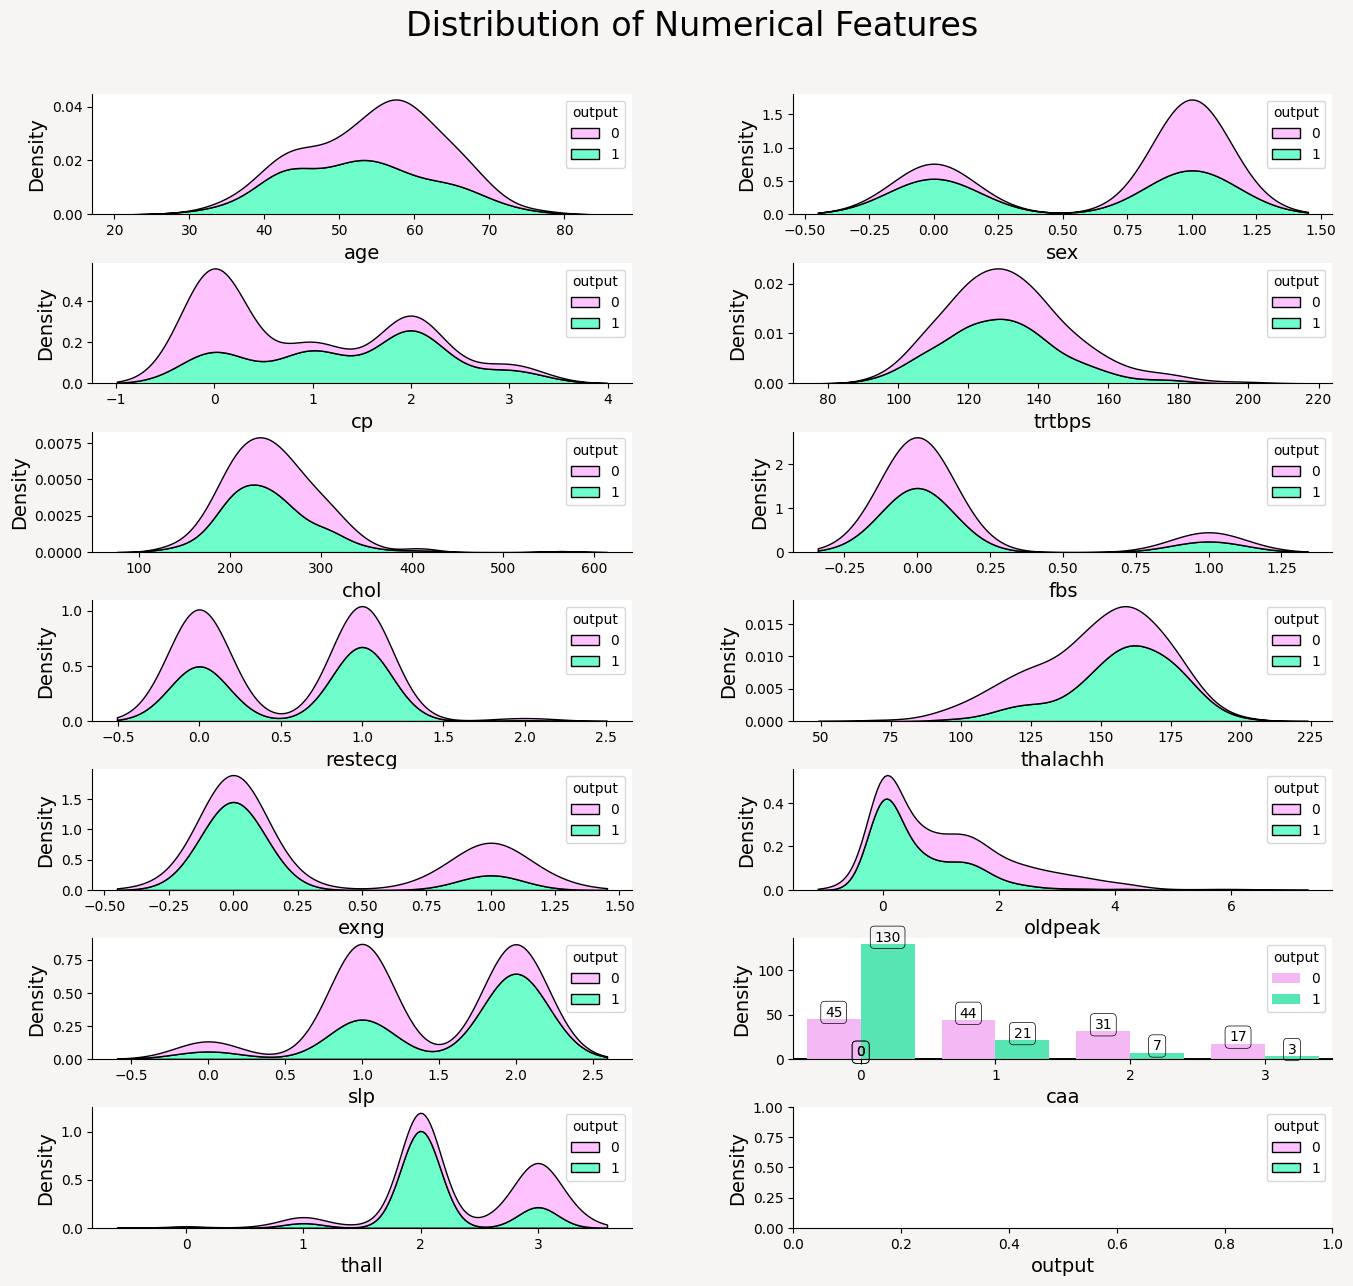

In [40]:
# Define the numerical features in the specified order
num_feats = ["age", "sex", "cp", "trtbps", "chol", "fbs", "restecg", 
             "thalachh", "exng", "oldpeak", "slp", "caa", "thall", "output"]

# Set up the number of rows and columns for subplots
L = len(num_feats)
ncol = 2
nrow = int(np.ceil(L / ncol))

# Create figure and subplots
fig, axes = plt.subplots(nrow, ncol, figsize=(16, 14), facecolor='#F6F5F4')
fig.subplots_adjust(top=0.92, hspace=0.4, wspace=0.3)  # Adjust spacing between subplots

# Loop through each numerical feature to create individual plots
for i, col in enumerate(num_feats):
    row, col_index = divmod(i, ncol)  # Calculate row and column index
    ax = axes[row, col_index]  # Get the subplot axis

    # Plot KDE for each numerical feature
    sns.kdeplot(data=data, x=col, hue="output", multiple="stack", palette=mypal[1::4], ax=ax)
    ax.set_xlabel(col, fontsize=14)  # Show x-label for each plot
    ax.set_ylabel("Density", fontsize=14)

    sns.despine(ax=ax, right=True)

    # Add countplot for 'num_major_vessels' column if present in your dataset
    if col == 'caa':  # Assuming 'caa' corresponds to 'num_major_vessels'
        sns.countplot(data=data, x=col, hue="output", palette=mypal[1::4], ax=ax)
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.0f}'.format(height), ha="center",
                    bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

# Remove empty subplots if any
for j in range(i + 1, nrow * ncol):
    fig.delaxes(axes.flat[j])

plt.suptitle('Distribution of Numerical Features', fontsize=24)
plt.show()


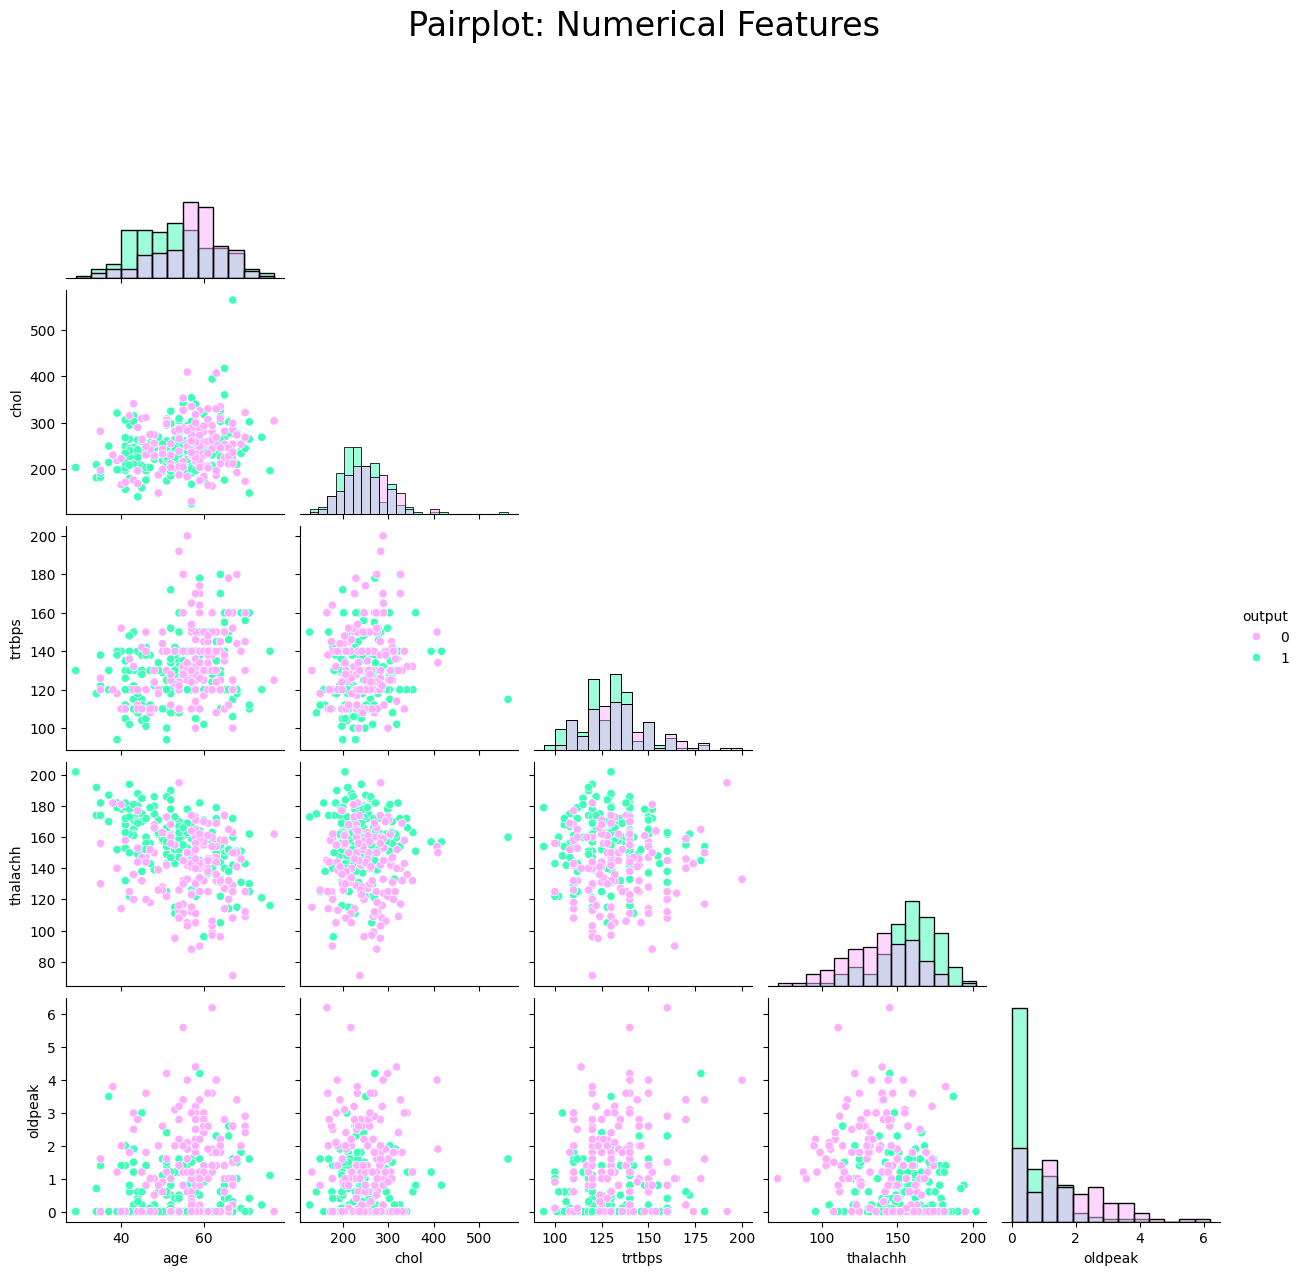

In [43]:
# Define the correct column names for the pair plot
num_feats = ['age', 'chol', 'trtbps', 'thalachh', 'oldpeak', 'output']

# Select only the specified columns from the dataset
data_ = data[num_feats]

# Create the pair plot
g = sns.pairplot(data_, hue="output", corner=True, diag_kind='hist', palette=mypal[1::4])

# Add a title to the pair plot
plt.suptitle('Pairplot: Numerical Features', fontsize=24, y=1.02)  # Adjust y to prevent title overlap
plt.show()


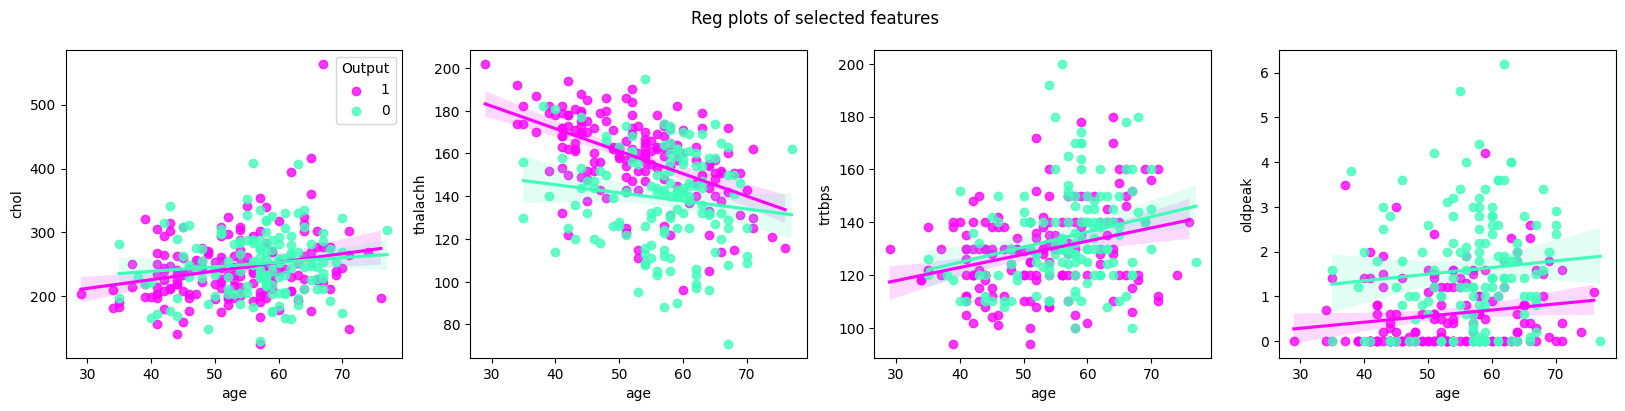

In [44]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

# Plot each regplot with 'output' instead of 'target'
sns.regplot(data=data[data['output'] == 1], x='age', y='chol', ax=ax[0], color=mypal[0], label='1')
sns.regplot(data=data[data['output'] == 0], x='age', y='chol', ax=ax[0], color=mypal[5], label='0')
sns.regplot(data=data[data['output'] == 1], x='age', y='thalachh', ax=ax[1], color=mypal[0], label='1')
sns.regplot(data=data[data['output'] == 0], x='age', y='thalachh', ax=ax[1], color=mypal[5], label='0')
sns.regplot(data=data[data['output'] == 1], x='age', y='trtbps', ax=ax[2], color=mypal[0], label='1')
sns.regplot(data=data[data['output'] == 0], x='age', y='trtbps', ax=ax[2], color=mypal[5], label='0')
sns.regplot(data=data[data['output'] == 1], x='age', y='oldpeak', ax=ax[3], color=mypal[0], label='1')
sns.regplot(data=data[data['output'] == 0], x='age', y='oldpeak', ax=ax[3], color=mypal[5], label='0')

# Set the title
plt.suptitle('Reg plots of selected features')

# Add a legend to the first axis only to avoid duplication
ax[0].legend(title='Output')

plt.show()


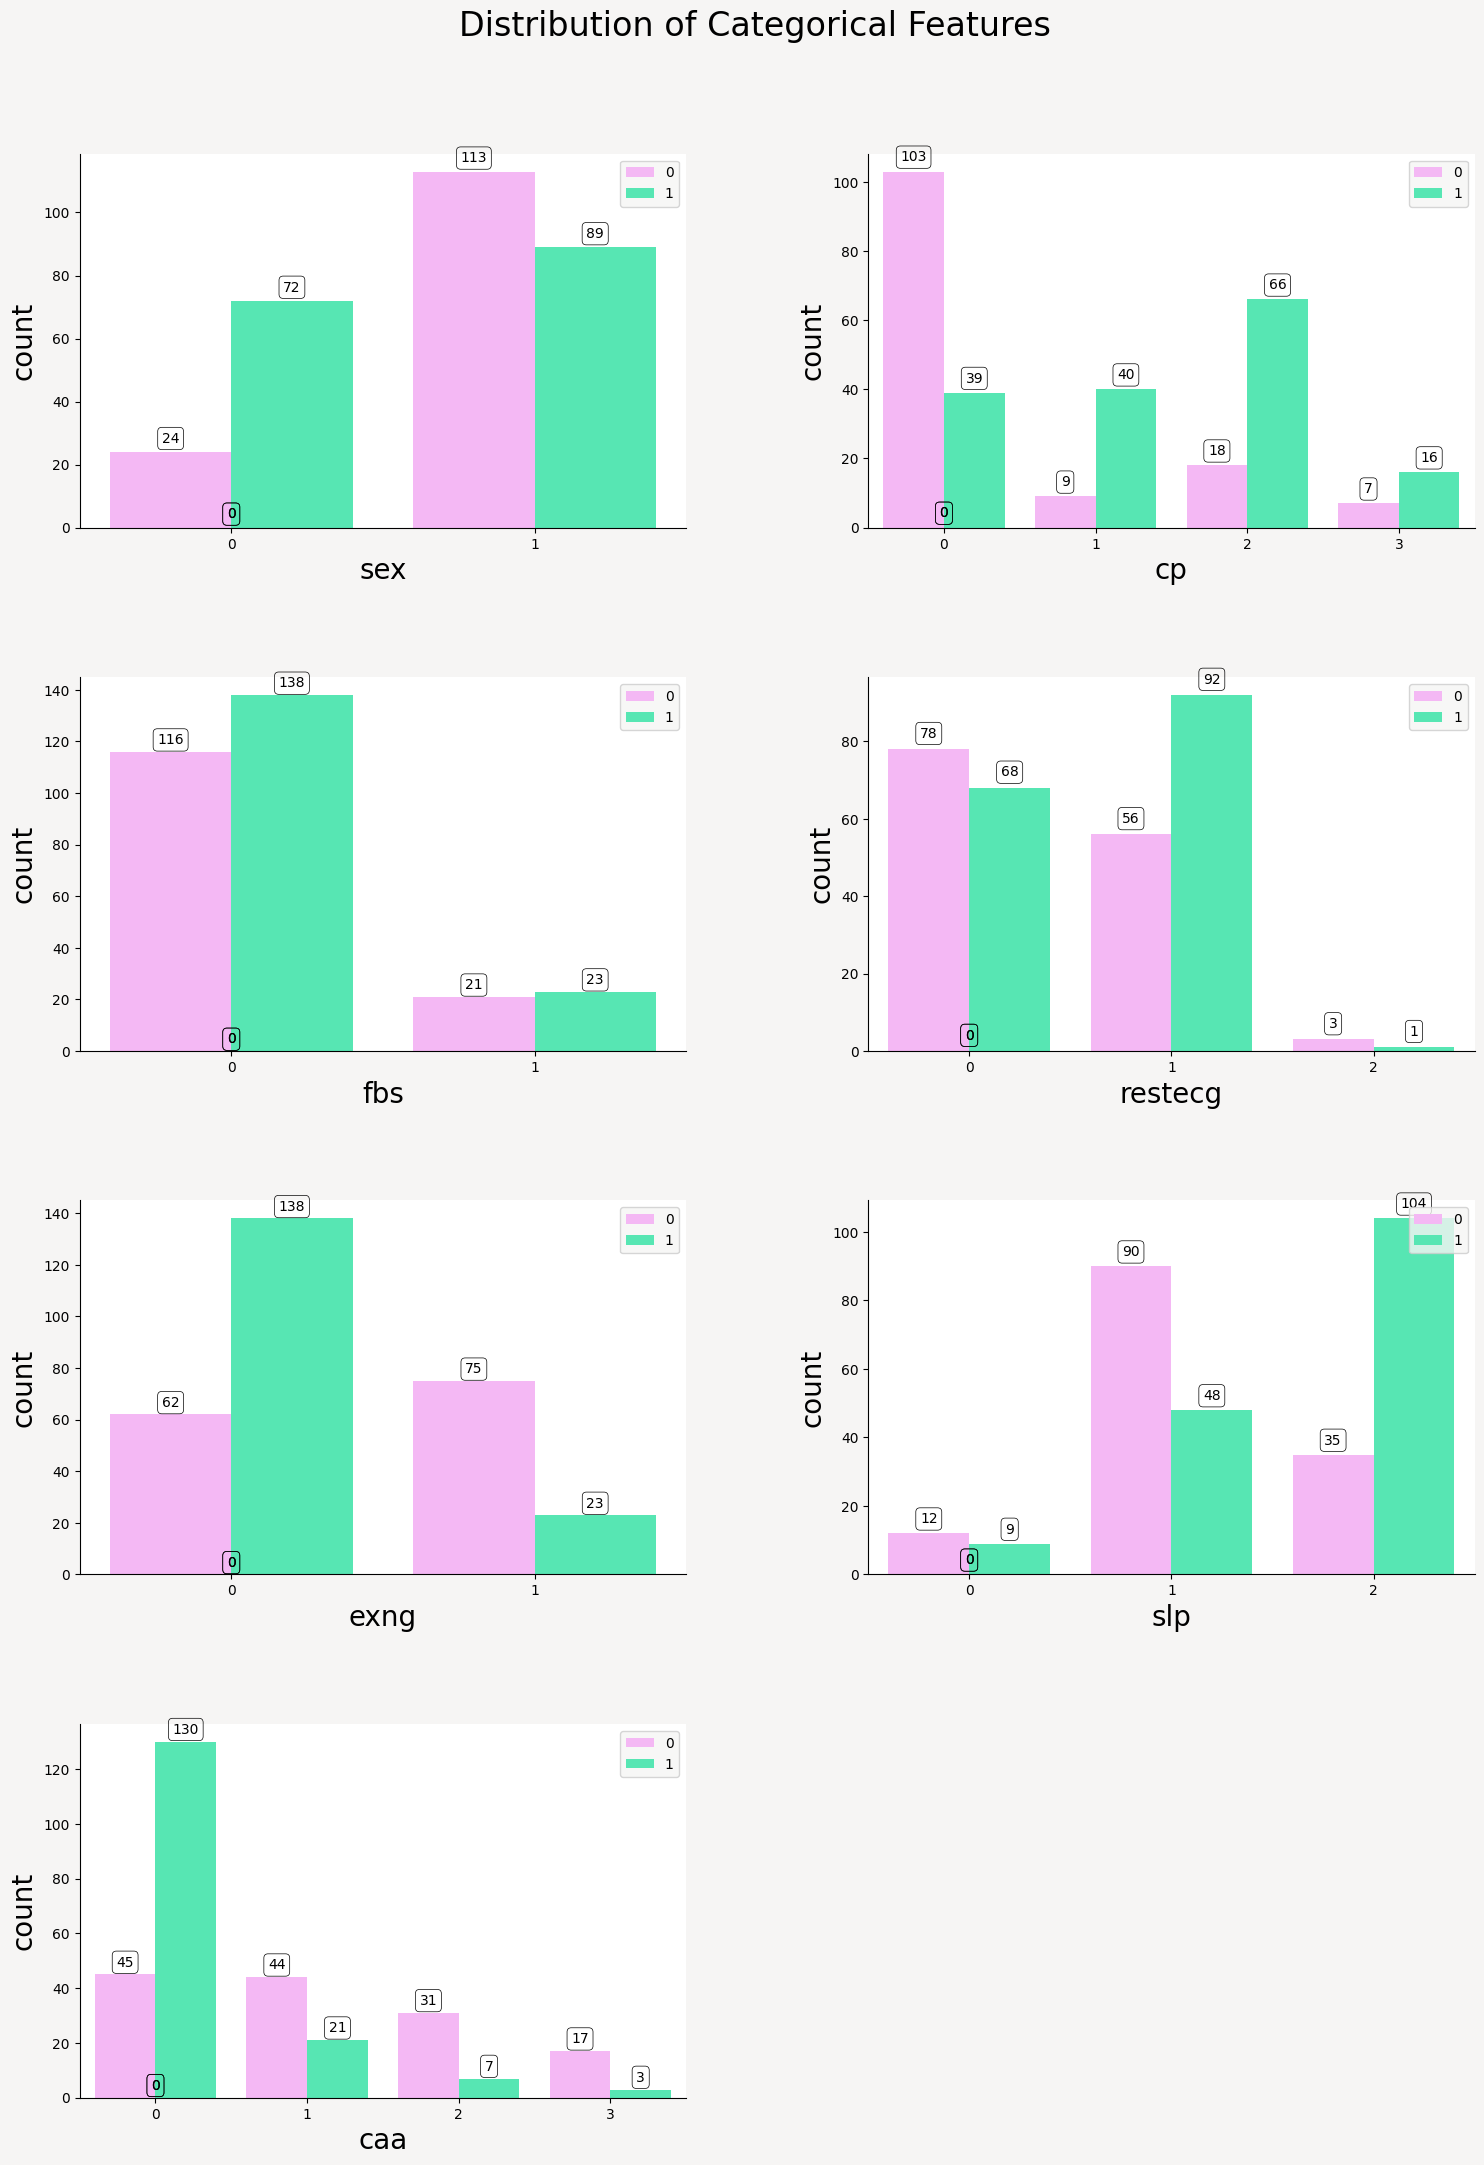

In [49]:
cat_feats = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']  # Replace with your actual categorical column names
def count_plot(data, cat_feats):    
    L = len(cat_feats)
    ncol = 2
    nrow = int(np.ceil(L / ncol))
    remove_last = (nrow * ncol) - L

    fig, axes = plt.subplots(nrow, ncol, figsize=(18, 24), facecolor='#F6F5F4')    
    fig.subplots_adjust(top=0.92, hspace=0.4, wspace=0.3)  # Adjust space between subplots
    
    # Hide extra subplot(s) if there are unused spaces in the grid
    if remove_last > 0:
        for i in range(1, remove_last + 1):
            fig.delaxes(axes.flatten()[-i])

    # Loop through each categorical feature to create individual count plots
    for i, col in enumerate(cat_feats):
        row, col_index = divmod(i, ncol)  # Calculate row and column index
        ax = axes[row, col_index]  # Get the specific subplot axis

        # Use 'output' instead of 'target'
        sns.countplot(data=data, x=col, hue="output", palette=mypal[1::4], ax=ax)
        ax.set_xlabel(col, fontsize=20)
        ax.set_ylabel("count", fontsize=20)
        sns.despine(ax=ax, right=True)
        
        # Set legend background color and adjust position
        ax.legend(facecolor='#F6F5F4', loc='upper right')

        # Annotate counts on bars
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.0f}'.format(height), ha="center",
                    bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
        
    # Set the title for the entire figure
    plt.suptitle('Distribution of Categorical Features', fontsize=24)
    plt.show()

# Run the function with 'output' as the target column
count_plot(data, cat_feats[0:-1])


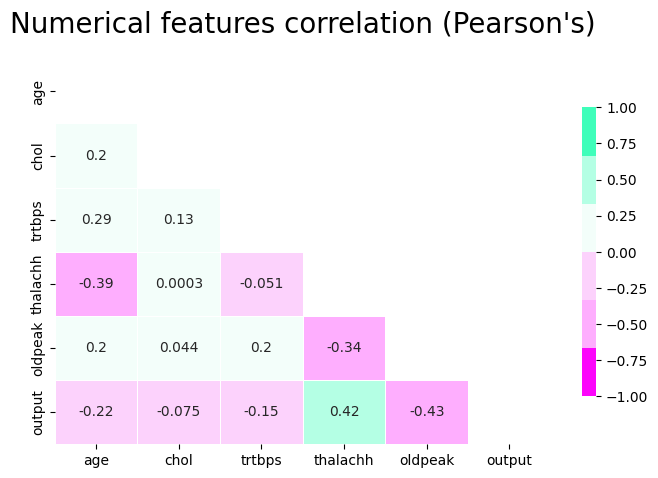

In [50]:
df_ = data[num_feats]
corr = df_.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Numerical features correlation (Pearson's)", fontsize=20, y= 1.05);